In [1]:
!python --version !pip show tensorflow

Python 3.11.11


In [2]:
!pip install tensorflow

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


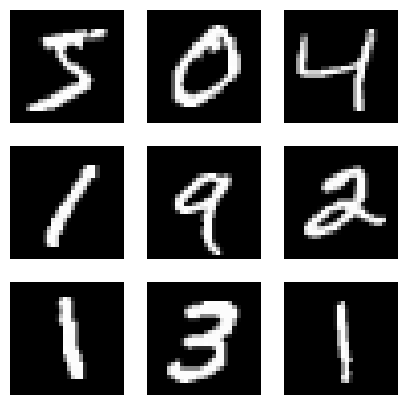

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data (scale pixel values between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Show sample images
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis('off')

plt.show()  # Show all images at once


In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Input layer
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer (10 classes)
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Save trained model
model.save("mnist_model.h5")
print("Model training complete and saved as mnist_model.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8794 - loss: 0.4307 - val_accuracy: 0.9571 - val_loss: 0.1475
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9635 - loss: 0.1227 - val_accuracy: 0.9716 - val_loss: 0.0949
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9749 - loss: 0.0830 - val_accuracy: 0.9713 - val_loss: 0.0897
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9827 - loss: 0.0591 - val_accuracy: 0.9764 - val_loss: 0.0738
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9867 - loss: 0.0437 - val_accuracy: 0.9753 - val_loss: 0.0808


Model training complete and saved as mnist_model.h5


In [5]:
import tensorflow as tf

# Load trained model
model = tf.keras.models.load_model("mnist_model.h5")

# Convert to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Enable optimizations (optional)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Allow select TensorFlow ops for compatibility (if needed)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,
                                       tf.lite.OpsSet.SELECT_TF_OPS]

# Convert model
tflite_model = converter.convert()

# Save the converted model
with open("mnist_model.tflite", "wb") as f:
    f.write(tflite_model)

print("Model successfully converted and saved as mnist_model.tflite")


Saved artifact at '/tmp/tmpcukexaj7'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  135580390550864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135580390553744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135580390553360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135580390552016: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model successfully converted and saved as mnist_model.tflite


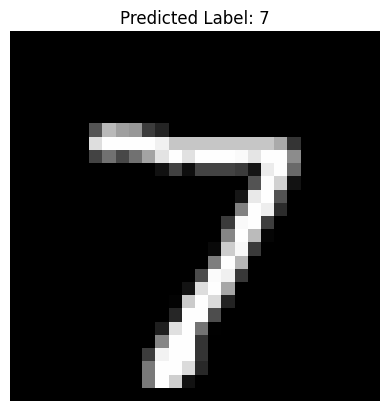

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST test dataset
(_, _), (x_test, y_test) = mnist.load_data()

# Normalize and reshape image for TFLite model
test_image = x_test[0].astype(np.float32) / 255.0  # Normalize pixel values
test_image = np.expand_dims(test_image, axis=0)  # Reshape to (1, 28, 28)

# Set input tensor
interpreter.set_tensor(input_details[0]['index'], test_image)

# Run inference
interpreter.invoke()

# Get output predictions
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_label = np.argmax(output_data)

# Display the image and predicted label
plt.imshow(x_test[0], cmap="gray")
plt.title(f"Predicted Label: {predicted_label}")
plt.axis("off")
plt.show()


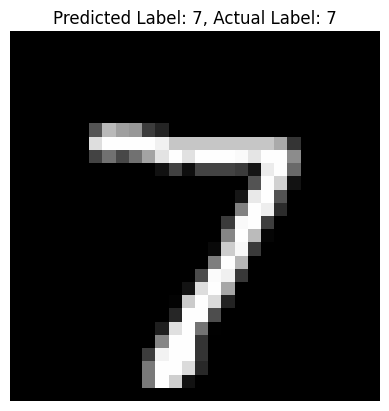

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST test dataset
(_, _), (x_test, y_test) = mnist.load_data()

# Normalize and reshape image for TFLite model
test_image = x_test[0].astype(np.float32) / 255.0  # Normalize pixel values to [0, 1]
test_image = np.expand_dims(test_image, axis=0)  # Reshape to (1, 28, 28)
# The model expects a 3D input (batch_size, height, width)

# Load TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path="mnist_model.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Set input tensor
interpreter.set_tensor(input_details[0]['index'], test_image)

# Run inference
interpreter.invoke()

# Get the prediction
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_label = np.argmax(output_data)

# Display the image and prediction
plt.imshow(x_test[0], cmap="gray")
plt.title(f"Predicted Label: {predicted_label}, Actual Label: {y_test[0]}")
plt.axis("off")
plt.show()
